In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
import numpy as np
from sklearn.model_selection import train_test_split
p = sns.load_dataset("penguins")
p.dropna(inplace=True)
p.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [9]:
p_train, p_test = train_test_split(p, test_size=0.3, random_state=42)
print(p_train.shape, p_test.shape)

(233, 7) (100, 7)


In [10]:
from sklearn.tree import DecisionTreeRegressor
features= ['bill_length_mm','bill_depth_mm','flipper_length_mm'] 
dt_regression = DecisionTreeRegressor(max_depth = 3) # Increase max_depth to see effect in the plot
dt_regression.fit(p_train[features], p_train['body_mass_g'])

DecisionTreeRegressor(max_depth=3)

In [11]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [12]:
predictionsOnTrainset = dt_regression.predict(p_train[features])
predictionsOnTestset = dt_regression.predict(p_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, p_train.body_mass_g)
rmseTest = calculate_rmse(predictionsOnTestset, p_test.body_mass_g)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 335.3727262942324
RMSE on test set 350.41154581335104


I did expect this difference. The result shows that the training set has a better score (lower is better) than the test set. The training set should always perform better than the test set because the predicting model has not seen the data in the test sets yet, so it has a lower chance of guessing it correctly.

In [13]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

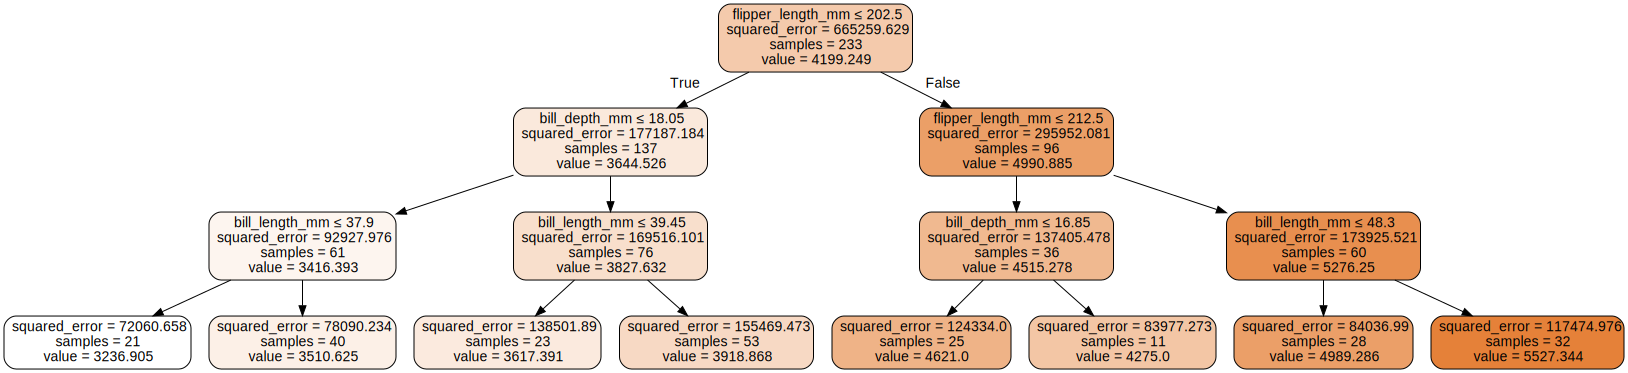

In [14]:
plot_tree_regression(dt_regression, features)

I understand the tree. the tree asks first one question, and it will result into a true or false, which will lead to a new question untill the tree can return a decent prediction.